In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
file_path = "/Users/christophersicking/Desktop/IMDB_Rating/ibm_attrition.csv"
df = pd.read_csv(file_path)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df = df.drop(columns=["EmployeeCount", "EmployeeNumber"])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df_dummy = pd.get_dummies(df, columns=[
    "BusinessTravel",
    "Department",
    "EducationField",
    "Gender",
    "JobRole",
    "MaritalStatus",
    "Over18",
    "OverTime",
])

In [5]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
y = [val for val in df_dummy.Attrition]
df_dummy = df_dummy.drop(columns=["Attrition"])

df_dummy = df_dummy[[
    'JobLevel',
    'MonthlyIncome',
    'NumCompaniesWorked',
    'PerformanceRating',
    'TotalWorkingYears',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'YearsSinceLastPromotion',
    'YearsWithCurrManager',
    'BusinessTravel_Travel_Rarely',
    'Department_Research & Development',
    'Department_Sales',
    'EducationField_Human Resources',
    'EducationField_Marketing',
    'EducationField_Medical',
    'EducationField_Technical Degree',
    'Gender_Male',
    'JobRole_Human Resources',
    'JobRole_Laboratory Technician',
    'JobRole_Manager',
    'JobRole_Research Director',
    'JobRole_Research Scientist',
    'JobRole_Sales Executive',
    'JobRole_Sales Representative',
    'MaritalStatus_Divorced',
    'MaritalStatus_Married',
    'MaritalStatus_Single',
    'OverTime_Yes']]

In [6]:
X = []

for i in range(len(df_dummy.index)):
    info = []
    
    for col in list(df_dummy.columns):   
        info.append(list(df_dummy[col])[i])
    
    X.append(info)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [8]:
X_scaler = StandardScaler().fit(X_train.reshape(-1, 1))

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

/Users/christophersicking/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


k: 1, Train/Test Score: 1.000/0.736
k: 3, Train/Test Score: 0.868/0.812
k: 5, Train/Test Score: 0.848/0.837
k: 7, Train/Test Score: 0.844/0.842
k: 9, Train/Test Score: 0.838/0.848
k: 11, Train/Test Score: 0.836/0.851
k: 13, Train/Test Score: 0.835/0.848
k: 15, Train/Test Score: 0.836/0.842
k: 17, Train/Test Score: 0.841/0.840
k: 19, Train/Test Score: 0.838/0.840
k: 21, Train/Test Score: 0.837/0.848
k: 23, Train/Test Score: 0.835/0.853
k: 25, Train/Test Score: 0.836/0.851
k: 27, Train/Test Score: 0.837/0.851
k: 29, Train/Test Score: 0.836/0.851
k: 31, Train/Test Score: 0.836/0.848
k: 33, Train/Test Score: 0.836/0.848
k: 35, Train/Test Score: 0.836/0.848
k: 37, Train/Test Score: 0.836/0.848
k: 39, Train/Test Score: 0.836/0.848


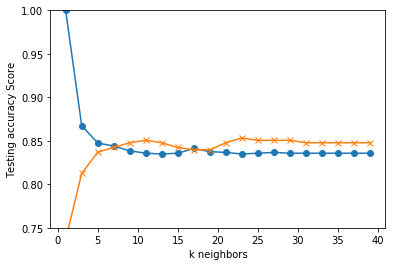

In [9]:
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.ylim(top=1, bottom=0.75)
plt.show()